In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

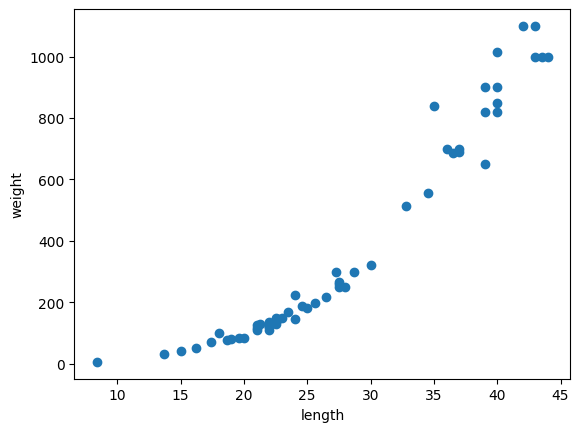

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42)

In [ ]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


- (4,)의 1차원 배열을 (2,2)의 2차원 배열로 바꿔주었다.

In [ ]:
test_array = test_array.reshape(2, 3)

ValueError: cannot reshape array of size 4 into shape (2,3)

- 지정한 크기(2 x 3 = 6)와 원본 배열의 원소 개수(4개)가 다르면, 다음과 같이 에러가 발생하게 된다.

In [ ]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


- (-1, 1)처럼 크기에 -1을 지정하면 자동으로 배열의 크기를 설정해줘서 편리함.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
print(knr.score(test_input, test_target))

0.992809406101064


In [ ]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
# 이웃의 개수를 3으로 설정합니다
knr.n_neighbors = 3

# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [ ]:
print(knr.score(test_input, test_target))

0.9746459963987609


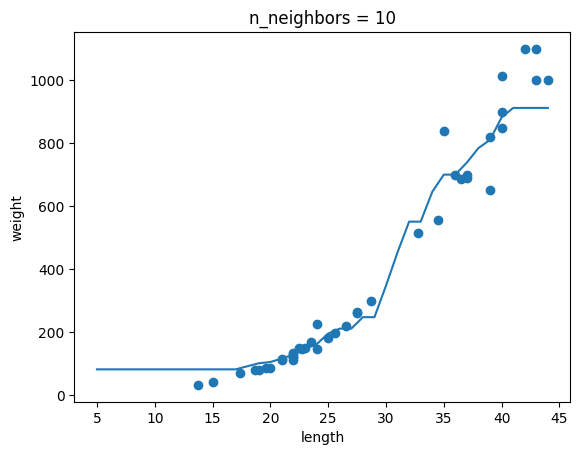

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다
for n in [1, 5, 10]:
  # 모델을 훈련합니다
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  # 지정한 범위 x에 대한 예측을 구합니다
  prediction = knr.predict(x)

# 훈련 세트와 예측 결과를 그래프로 그립니다
plt.scatter(train_input, train_target)
plt.plot(x, prediction)
plt.title('n_neighbors = {}'.format(n))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()